In [1]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
import os
# Display MetaTrader5 package information

print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for i in lst_:
    # Initialize connection to the MetaTrader 5 terminal
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        quit()

    # Set the time zone to UTC
    timezone = pytz.timezone("Etc/UTC")    
    

    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=1)  # Changed to represent one week
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range
    utc_from = local_time - days_offset
    utc_to = local_time


     # Get historical price data for USD/JPY on a 30-minute timeframe
    symbol = i
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

        # Shut down the connection to the MetaTrader 5 terminal
    mt5.shutdown()

        # Display the first 10 elements of the obtained data
        # print("Display obtained data 'as is'")
        # for rate in rates[:10]:
        #     print(rate)
        #print(type(rates))

        # Create a DataFrame from the obtained data
    dict_[f'df_30_{i}'] = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
    dict_[f'df_30_{i}']['time'] = pd.to_datetime(dict_[f'df_30_{i}']['time'], unit='s')

        # Display the data as a DataFrame
    #     print("\nDisplay dataframe with data")
    #     print(dict_[f'df_30_{i}'].head(10))   

MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.


In [2]:
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')

In [3]:
df_close.columns = [i for i in lst_ if 'JPY' not in i]

In [4]:
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_weekly.xlsx')

In [5]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_weeklycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

In [6]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_weeklycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

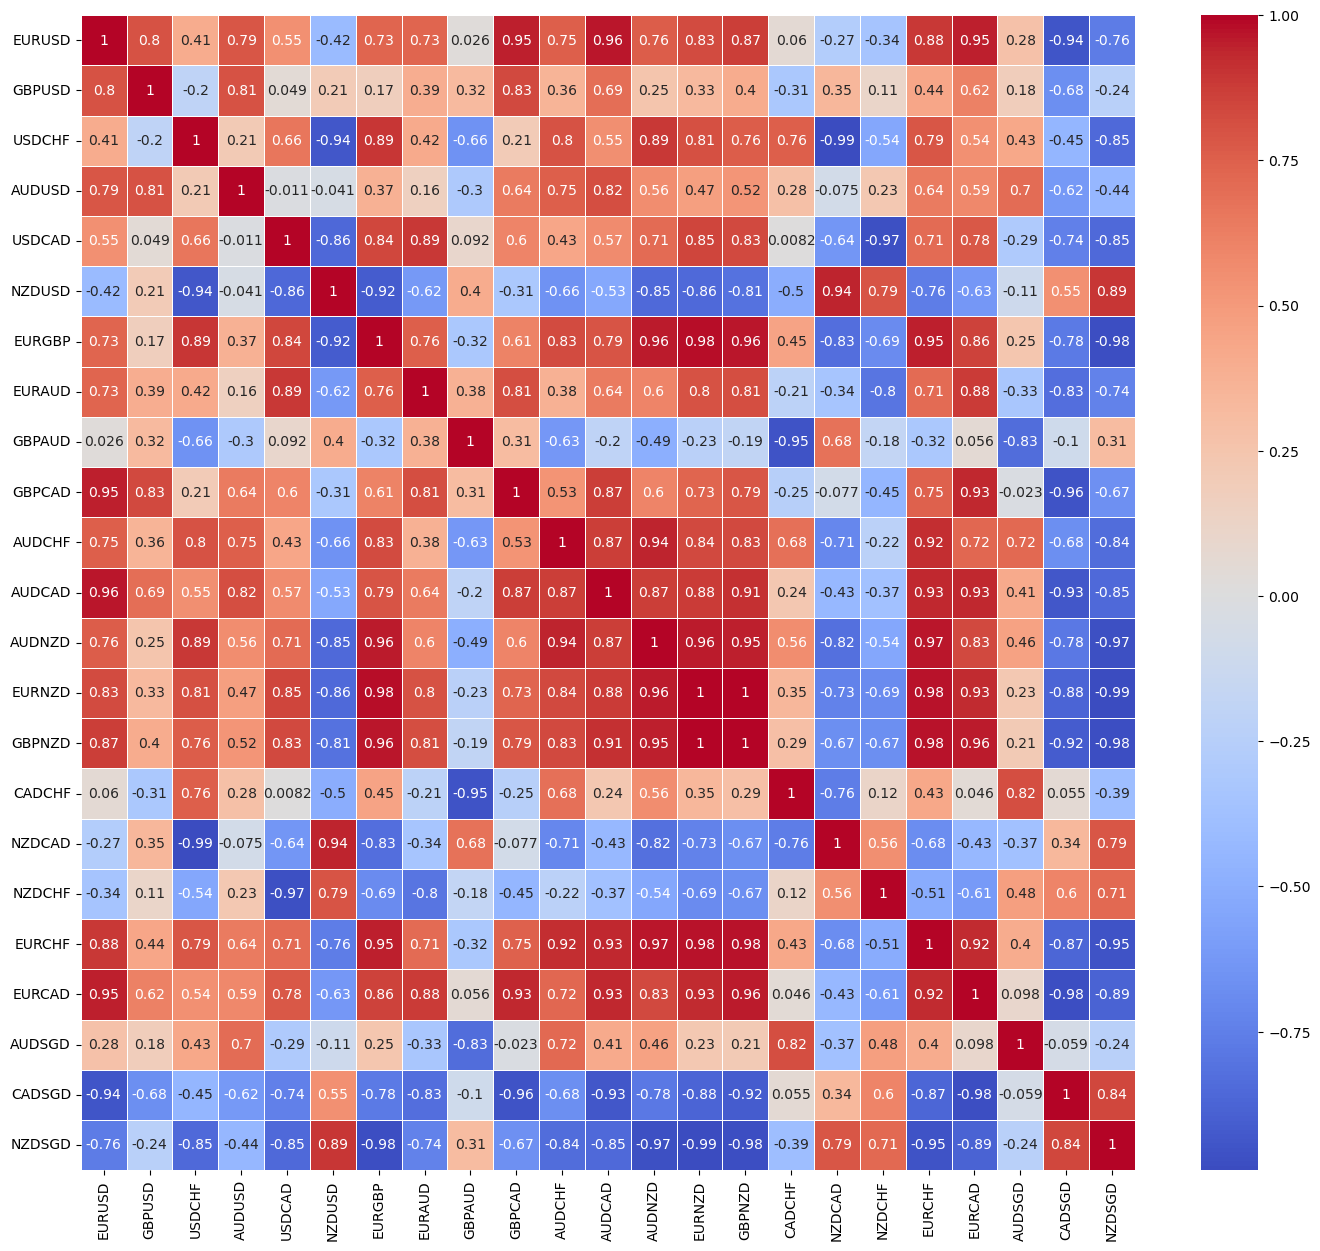

In [7]:
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-Daily.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();